# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-block alert-warning">
<font color=black>

**What?** Confidence intervals from scratch

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

# Statistical inference

<div class="alert alert-info">
<font color=black>

- Statistical inference is the process of analyzing sample data to gain insight into the population from which the data was collected and to investigate differences between data samples. 
- In data analysis, we are often interested in the characteristics of some large population, but collecting data on the entire population may be infeasible. 
- For example, leading up to U.S. presidential elections it could be very useful to know the political leanings of every single eligible voter, but surveying every voter is not feasible. 
- Instead, we could poll some subset of the population, such as a thousand registered voters, and use that data to make inferences about the population as a whole.

</font>
</div>

# Point estimates

<div class="alert alert-info">
<font color=black>

- Let's investigate point estimates by generating a population of random age data and then drawing a sample from it  to estimate the mean:
- Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

</font>
</div>

In [3]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [7]:
np.random.seed(6)
# Sample 1000 values
sample_ages = np.random.choice(a= population_ages, size=1000) 
# Show sample mean
print ( sample_ages.mean() )                         
# Check difference between means
population_ages.mean() - sample_ages.mean()   

42.665


0.337372000000002

# Sampling Distributions and The Central Limit Theorem

In [ ]:
"""
Many statistical procedures assume that data follows a normal distribution, because the normal distribution has 
nice properties like symmetricity and having the majority of the data clustered within a few standard deviations of 
the mean. Unfortunately, real world data is often not normally distributed and the distribution of a sample tends to
mirror the distribution of the population. This means a sample taken from a population with a skewed distribution 
will also tend to be skewed. Let's investigate by plotting the data and sample we created earlier and by checking 
the skew
"""

-0.12008483603917186


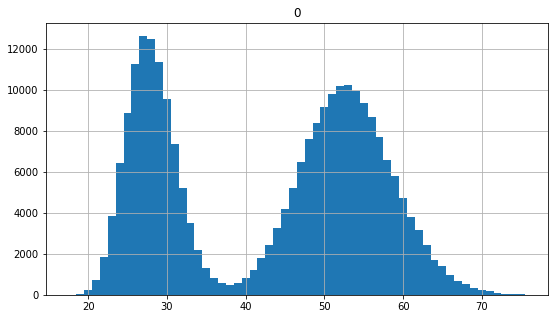

In [13]:
pd.DataFrame(population_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,5))

print( stats.skew(population_ages) );

In [ ]:
"""
The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric
bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this population 
should have roughly the same shape and skew:
"""

-0.06061698760123025


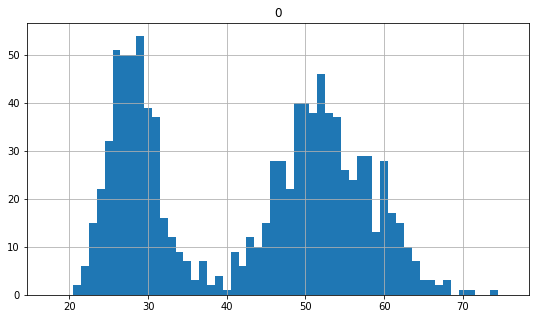

In [12]:
pd.DataFrame(sample_ages).hist(bins=58,
                                  range=(17.5,75.5),
                                  figsize=(9,5));

print( stats.skew(sample_ages) )

In [ ]:
"""
The sample has roughly the same shape as the underlying population. This suggests that we can't apply techniques that
assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit 
theorem.

The central limit theorem is one of the most important results of probability theory and serves as the foundation of
many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, 
known as a sampling distribution, will be normally distributed. This rule holds even if the underlying distribution 
itself is not normally distributed. As a result we can treat the sample mean as if it were drawn normal distribution.

To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 
point estimates of the mean:
"""

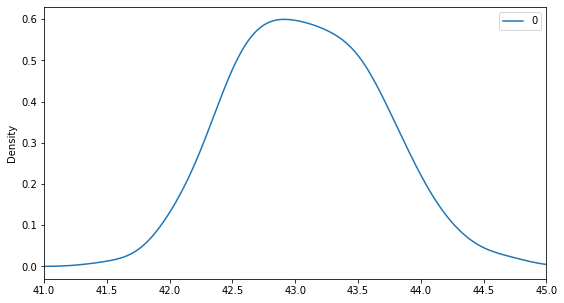

In [15]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= population_ages, size=500)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,5),
                                   xlim=(41,45));  

In [ ]:
"""
The sampling distribution appears to be roughly normal, despite the bimodal population distribution that the samples
were drawn from. In addition, the mean of the sampling distribution approaches the true population mean:
"""

In [16]:
population_ages.mean() - np.array(point_estimates).mean()

-0.08440799999999626

In [ ]:
"""
The more samples we take, the better our estimate of the population parameter is likely to be.
"""

# Confidence intervals

In [ ]:
"""
Calculate a confidence interval by taking a point estimate and then adding and subtracting a margin of error to 
create a range. Margin of error is based on your desired confidence level, the spread of the data and the size of 
your sample. The way you calculate the margin of error DEPENDS on whether you know the standard deviation of the 
population or not.
"""

## We know the standard deviation

In [ ]:
"""
If you know the standard deviation of the population, the margin of error is equal to: z*(sigma/sqrt(n))

Where σ (sigma) is the population standard deviation, n is sample size, and z is a number known as the z-critical
value. The z-critical value is the number of standard deviations you'd have to go from the mean of the normal 
distribution to capture the proportion of the data associated with the desired confidence level. For instance, 
we know that roughly 95% of the data in a normal distribution lies within 2 standard deviations of the mean, so
we could use 2 as the z-critical value for a 95% confidence interval (although it is more exact to get z-critical
values with stats.norm.ppf().).

Let's calculate a 95% confidence for our mean point estimate:
"""

In [21]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

# Check the z-critical value*
z_critical = stats.norm.ppf(q = 0.975)

# Check the z-critical value
print("z-critical value:", z_critical)

pop_stdev = population_ages.std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

print("Mean", sample_mean)
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:", confidence_interval)

z-critical value: 1.959963984540054
Mean 42.523
Confidence interval: (41.70306406882683, 43.34293593117317)


In [ ]:
"""
Note: We use stats.norm.ppf(q = 0.975) to get the desired z-critical value instead of q = 0.95 because the 
distribution has two tails.

Notice that the confidence interval we calculated captures the true population mean of 43.0023.

Let's create several confidence intervals and plot them to get a better sense of what it means to "capture" the 
true mean:
"""

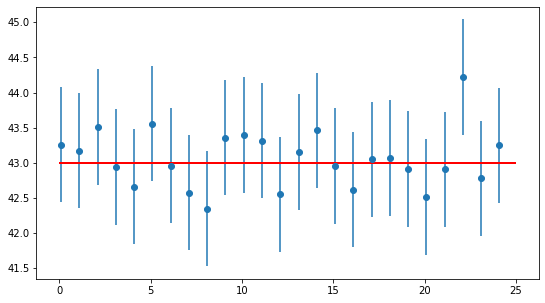

In [24]:
np.random.seed(12)

sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= population_ages, size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    # Get the z-critical value*         
    z_critical = stats.norm.ppf(q = 0.975)  

    # Get the population standard deviation
    pop_stdev = population_ages.std()  

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)

plt.figure(figsize=(9,5))

plt.errorbar(x=np.arange(0.1, 25, 1), y=sample_means, yerr=[(top-bot)/2 for top,bot in intervals], fmt='o')

plt.hlines(xmin=0, xmax=25, y=43.0023, linewidth=2.0, color="red");

In [ ]:
"""
Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true 
mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect 
our interval to miss the true mean 5% of the time.
"""

## You do not know the standard deviation

In [ ]:
"""
If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as
a stand in when creating confidence intervals. Since the sample standard deviation may not match the population 
parameter the interval will have more error when you don't know the population standard deviation. To account for 
this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn
from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets 
wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we
can get t-critical values with stats.t.ppf().

Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, 
using the t-distribution:
"""

In [25]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a= population_ages, size = sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q = 0.975, df=24)  # Get the t-critical value*

print("t-critical value:")                  # Check the t-critical value
print(t_critical)                        

sample_stdev = sample.std(ddof=1)    # Get the sample standard deviation

sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
2.0638985616280205
Confidence interval:
(37.65147508161371, 48.108524918386294)


In [ ]:
"""
Note: when using the t-distribution, you have to supply the degrees of freedom (df). For this type of test, the 
degrees of freedom is equal to the sample size minus 1. If you have a large sample size, the t-distribution 
approaches the normal distribution.

Notice that the t-critical value is larger than the z-critical value we used for 95% confidence interval. This allows
the confidence interval to cast a larger net to make up for the variability caused by using the sample standard 
deviation in place of the population standard deviation. The end result is a much wider confidence interval (an 
interval with a larger margin of error.).

If you have a large sample, the t-critical value will approach the z-critical value so there is little difference 
between using the normal distribution vs. the t-distribution:
"""

In [26]:
# Check the difference between critical values with a sample size of 1000             
stats.t.ppf(q=0.975, df= 999) - stats.norm.ppf(0.975)  

0.0023774765933946007

In [ ]:
"""
Instead of calculating a confidence interval for a mean point estimate by hand, you can calculate it using the 
Python function stats.t.interval():
"""

In [28]:
stats.t.interval(alpha = 0.95,              # Confidence level
                 df= 24,                    # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.65147508161371, 48.108524918386294)

# References

<div class="alert alert-block alert-warning">
<font color=black>

- https://www.kaggle.com/hamelg/python-for-data-23-confidence-intervals<br>

</font>
</div>